In [1]:
import numpy as np
import matplotlib.pyplot as plt

# To create a 15x10 grid spaces, we will need 16x11 gridpoints to cover each region in x,y
# N refers to the number of x gridpoints, and M refers to y
N = int(input('Enter number of grid points on a side: '))
M = int(input('Enter number of grid points on a side: '))

L = 1.5              # Length of x is 1.5m
h = L/(N-1)          # Grid spacing x
x = np.arange(N)*h   # x coordinate

L2 = 1                #Length of y is 1m
h1 = L2/(M-1)         #Grid spacing for y (increments of .1)
y = np.arange(M)*h1   # y coordinate
print(h)
print(h1)

Enter number of grid points on a side: 16
Enter number of grid points on a side: 11
0.1
0.1


In [2]:
# Zero-out array for all phi values in waveguide
phi = np.zeros((N,M))
phi

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [3]:
# Update array with boundary conditions
phi[0,:] = 0.
phi[15,:] = 100.
phi[:,0] = 10.
phi[:,10] = 40.    

print(phi)

[[ 10.   0.   0.   0.   0.   0.   0.   0.   0.   0.  40.]
 [ 10.   0.   0.   0.   0.   0.   0.   0.   0.   0.  40.]
 [ 10.   0.   0.   0.   0.   0.   0.   0.   0.   0.  40.]
 [ 10.   0.   0.   0.   0.   0.   0.   0.   0.   0.  40.]
 [ 10.   0.   0.   0.   0.   0.   0.   0.   0.   0.  40.]
 [ 10.   0.   0.   0.   0.   0.   0.   0.   0.   0.  40.]
 [ 10.   0.   0.   0.   0.   0.   0.   0.   0.   0.  40.]
 [ 10.   0.   0.   0.   0.   0.   0.   0.   0.   0.  40.]
 [ 10.   0.   0.   0.   0.   0.   0.   0.   0.   0.  40.]
 [ 10.   0.   0.   0.   0.   0.   0.   0.   0.   0.  40.]
 [ 10.   0.   0.   0.   0.   0.   0.   0.   0.   0.  40.]
 [ 10.   0.   0.   0.   0.   0.   0.   0.   0.   0.  40.]
 [ 10.   0.   0.   0.   0.   0.   0.   0.   0.   0.  40.]
 [ 10.   0.   0.   0.   0.   0.   0.   0.   0.   0.  40.]
 [ 10.   0.   0.   0.   0.   0.   0.   0.   0.   0.  40.]
 [ 10. 100. 100. 100. 100. 100. 100. 100. 100. 100.  40.]]


In [10]:
#* Loop until desired fractional change per iteration is obtained
newphi = np.copy(phi)    # Copy the array of phi with boundary conditions
iterMax = N**2           # Set max to avoid excessively long runs
change = np.zeros(iterMax)
changeDesired = 1.e-7    # Stop when the change is given fraction
print('Desired fractional change = ', 1e-4)
  
#Iterate over the nested for-loop iterMax (N^2) amount of times
#We will set a limit on the iterations 

for iter in range(iterMax):
    changeSum = 0  #
    
    # Loop over interior points only; i and j go from 1 to N/M-1
    # We will update the matrix with interior y points represented by j, in all x
    # Then we update all x values
    # This will be re-iterated until values converge accurately
    for i in range(1,N-1):    
        for j in range(1,M-1):     
                newphi[i,j] = .25*( phi[i+1,j] + phi[i-1,j] + 
                                    phi[i,j-1] + phi[i,j+1] )
                #As changeSum approaches zero, it will meet the condition to stop iterations
                changeSum += abs(1 - phi[i,j]/newphi[i,j] ) 
             
        phi = np.copy(newphi)   
        
    
    # Check if fractional change is small enough to halt the iteration
    change[iter] = changeSum/(N-2)**2
    if (iter+1) % 10 < 1 :
        print('After ', iter+1, 'iterations, fractional change = ', change[iter])

    #As the change array reaches a value above changeDesired assigned above, it will stop iterating
    if change[iter] < changeDesired : 
        print('Desired accuracy achieved after ', iter+1, ' iterations' )
        break

Desired fractional change =  0.0001
After  10 iterations, fractional change =  5.731603805133759e-06
After  20 iterations, fractional change =  3.540207822731535e-06
After  30 iterations, fractional change =  2.1866606165997985e-06
After  40 iterations, fractional change =  1.3506213795898083e-06
After  50 iterations, fractional change =  8.342291379931706e-07
After  60 iterations, fractional change =  5.152720797994185e-07
After  70 iterations, fractional change =  3.1826396016523533e-07
After  80 iterations, fractional change =  1.965793953349241e-07
After  90 iterations, fractional change =  1.2141945675026475e-07
Desired accuracy achieved after  95  iterations


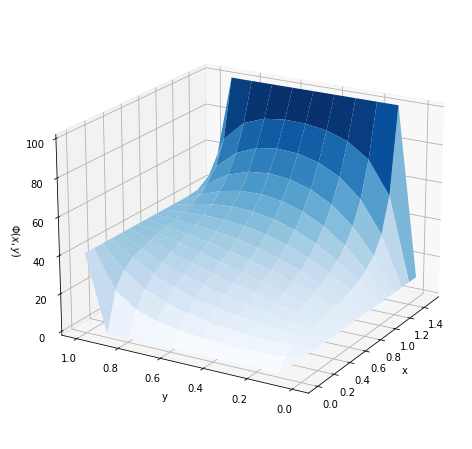

In [11]:
#Create plot to visualize voltage at all x,y coordinates

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection = '3d')
Xp, Yp = np.meshgrid(x, y)
ax.plot_surface(Xp, Yp, np.flipud(np.rot90(phi)), rstride=1, cstride=1, cmap=cm.Blues)
ax.view_init(elev=20., azim=210.)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel(r'$\Phi(x,y)$')
plt.show()

In [12]:
print([phi[5,5],phi[8,8],phi[10,5],phi[8,2]])

[22.488446942183177, 38.586111401131156, 43.222749899230145, 20.971451095461386]
